In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("supermarket sales.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.shape

(1000, 17)

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [7]:
df.groupby("Branch")["Rating"].mean()

Branch
A    7.027059
B    6.818072
C    7.072866
Name: Rating, dtype: float64

In [10]:
correlation_coefficient = df["Rating"].corr(df["Quantity"])
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")

Pearson Correlation Coefficient: -0.01581490462716696


In [18]:
df['Average_Transaction_Value'] = df['Total'] / df['Quantity']
df['Average_Profit_Per_Sale'] = (df['Total'] - df['cogs']) / df['Quantity']

#Print KPIs

print("Average Transaction Value:", df['Average_Transaction_Value'].mean())
print("Average_Profit_Per_Sale:", df['Average_Profit_Per_Sale'].mean())

Average Transaction Value: 58.45573649999999
Average_Profit_Per_Sale: 2.7836065


In [19]:
#Print all unique ratings

unique_ratings =df['Rating'].unique()
print("Unique Rating;", sorted(unique_ratings))

Unique Rating; [4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0]


Text(0.5, 1.0, 'Distribution of Ratings')

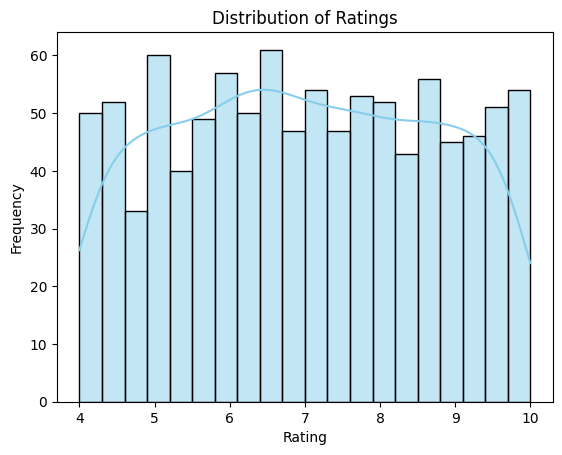

In [20]:
# Create a histogram using seaborn seeing as there is a large number of values, we can put these into Bins
sns.histplot(data=df, x='Rating', bins=20, kde=True, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')

Text(0.5, 1.0, 'Distribution of Payment Methods')

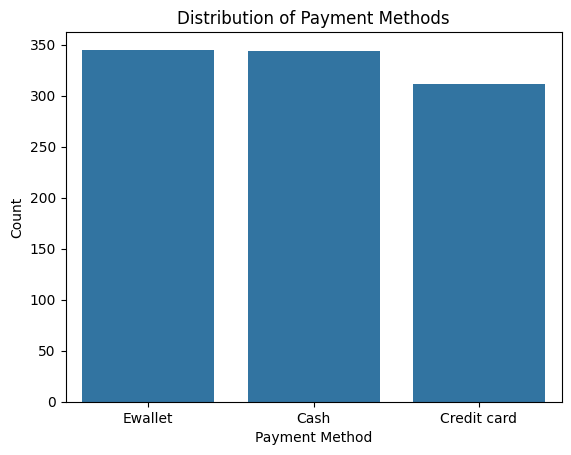

In [21]:
sns.countplot(data=df, x='Payment')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Distribution of Payment Methods')

Text(0.5, 1.0, 'Distribution of Payment Methods by Store')

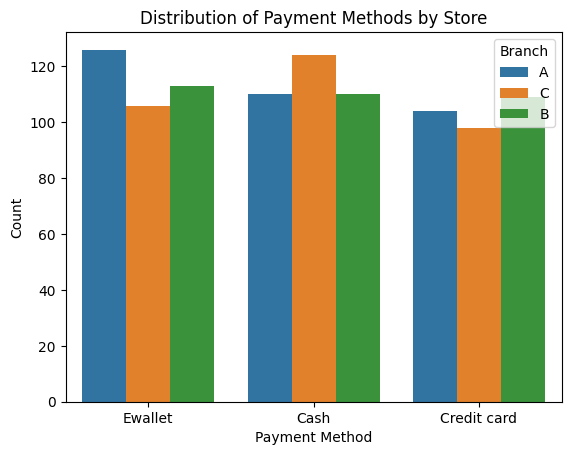

In [22]:
sns.countplot(data=df, x='Payment',hue='Branch')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Distribution of Payment Methods by Store')

C:\Users\Samran Ahmed\AppData\Local\Temp\ipykernel_14032\2744718426.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Product line', y='Total', ci=None)


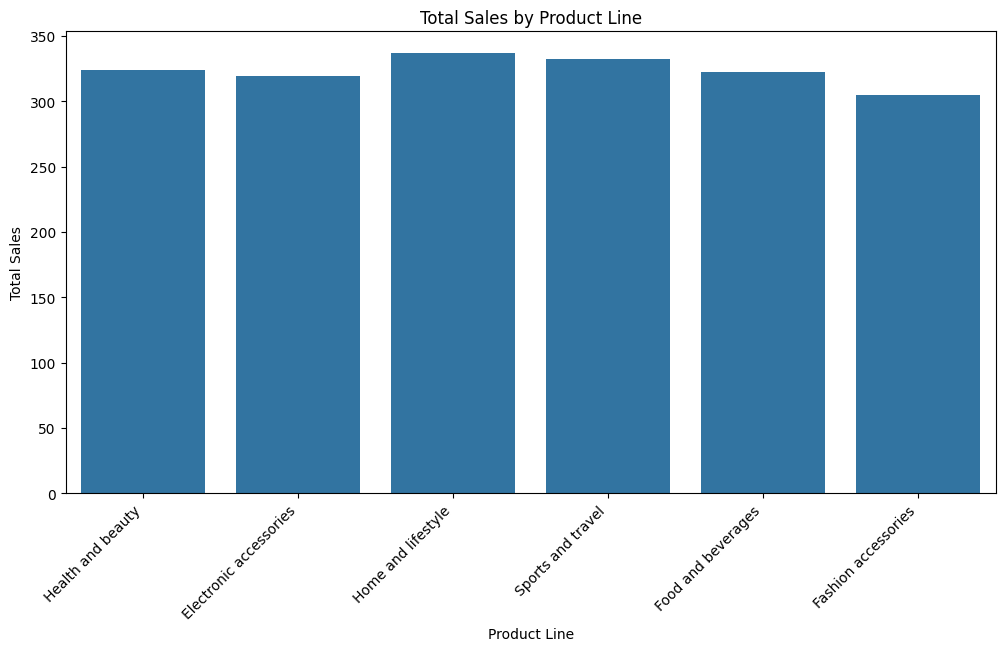

In [23]:
#Product Line Analysis:

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Product line', y='Total', ci=None)
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product Line')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\Samran Ahmed\AppData\Local\Temp\ipykernel_14032\1453489496.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Customer type', y='Total', hue='Gender', ci=None)


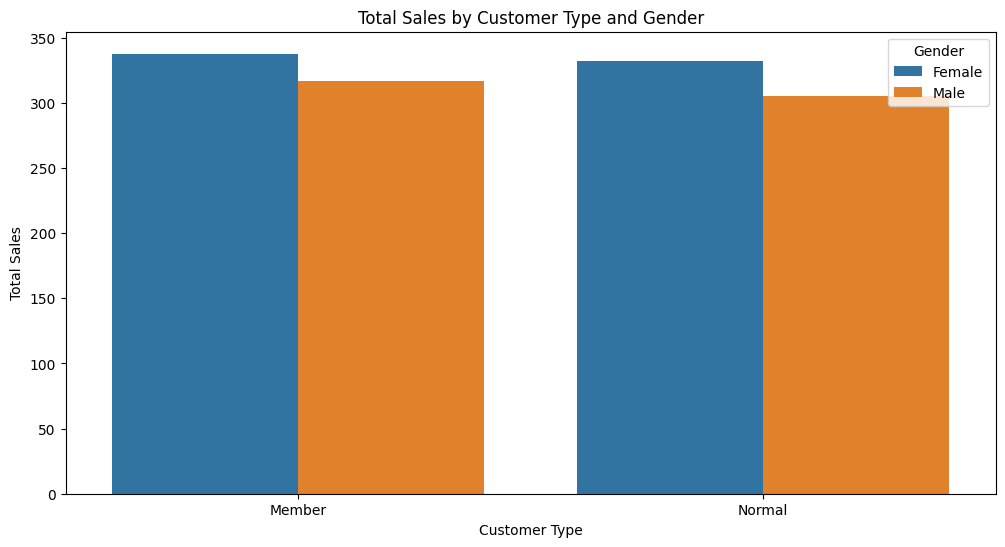

In [24]:
# Visualise total sales by customer type and gender
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Customer type', y='Total', hue='Gender', ci=None)
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Customer Type and Gender')
plt.show()

Text(0.5, 1.0, 'Total Sales by Day of the Week')

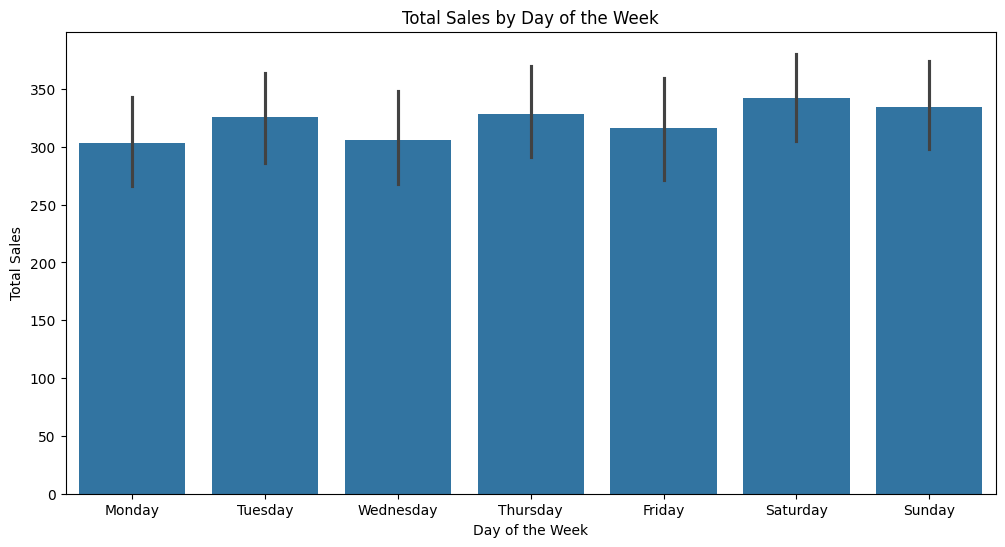

In [25]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day_of_Week'] = df['Date'].dt.day_name()

# Visualise total sales by day of the week
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Day_of_Week', y='Total', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.title('Total Sales by Day of the Week')

Text(0.5, 1.0, 'Customer Segmentation based on Total Spending')

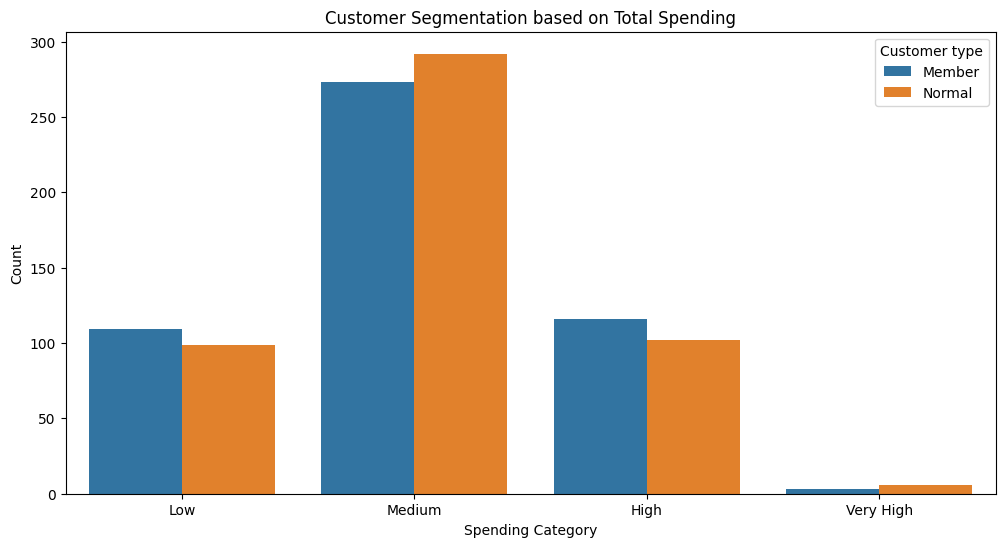

In [26]:
#Segmentation based on total spending
df['Spending_Category'] = pd.cut(df['Total'], bins=[0, 100, 500, 1000, np.inf], labels=['Low', 'Medium', 'High', 'Very High'])

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Spending_Category', hue='Customer type')
plt.xlabel('Spending Category')
plt.ylabel('Count')
plt.title('Customer Segmentation based on Total Spending')

C:\Users\Samran Ahmed\AppData\Local\Temp\ipykernel_14032\1936946292.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour


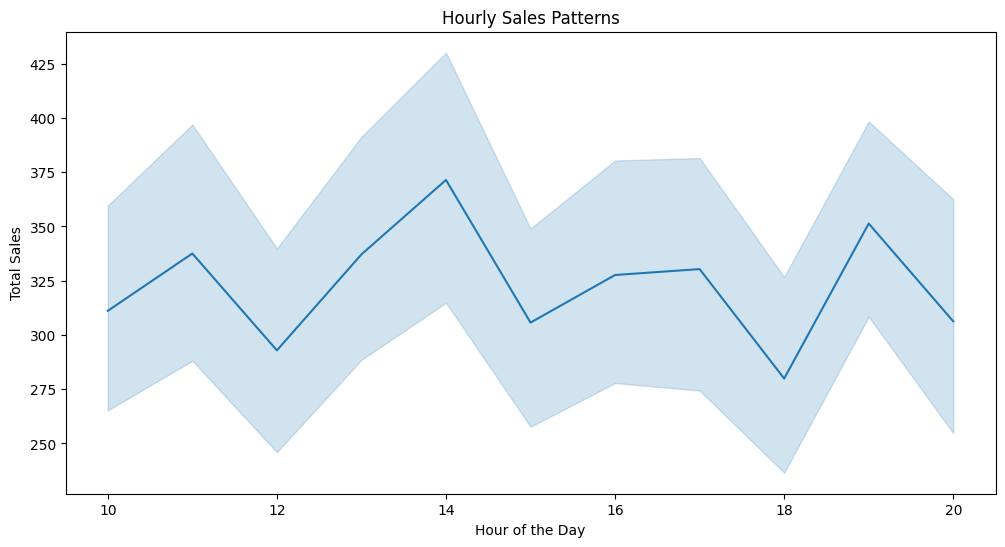

In [27]:
# Example: Hourly sales patterns
df['Hour'] = pd.to_datetime(df['Time']).dt.hour

# Visualise hourly sales patterns
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Hour', y='Total')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.title('Hourly Sales Patterns')
plt.show()